# Step 1 import lib ,unzip and read file

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.signal import butter, lfilter
from scipy.fft import fft, fftfreq
import random

In [ ]:
!unzip '/content/cleaned_data_many_position.zip'

Archive:  /content/cleaned_data_many_position.zip
   creating: cleaned_data_many_position/
   creating: cleaned_data_many_position/backpack/
  inflating: cleaned_data_many_position/backpack/climbing_stairs.csv  
  inflating: cleaned_data_many_position/backpack/descending_stairs.csv  
  inflating: cleaned_data_many_position/backpack/nothing1.csv  
  inflating: cleaned_data_many_position/backpack/nothing2.csv  
  inflating: cleaned_data_many_position/backpack/running.csv  
  inflating: cleaned_data_many_position/backpack/sitting_standing_transition.csv  
  inflating: cleaned_data_many_position/backpack/walking.csv  
   creating: cleaned_data_many_position/hand/
  inflating: cleaned_data_many_position/hand/climbing_stairs.csv  
  inflating: cleaned_data_many_position/hand/descending_stairs.csv  
  inflating: cleaned_data_many_position/hand/nothing1.csv  
  inflating: cleaned_data_many_position/hand/nothing2.csv  
  inflating: cleaned_data_many_position/hand/running.csv  
  inflating: clea

In [ ]:
!unzip '/content/spectro_patronum.zip' -d "/content/train/"

Archive:  /content/spectro_patronum.zip
   creating: /content/train/spectro_patronum/
  inflating: /content/train/spectro_patronum/class1_climbing_backpack.npy  
  inflating: /content/train/spectro_patronum/class1_climbing_hand.npy  
  inflating: /content/train/spectro_patronum/class1_climbing_leg.npy  
  inflating: /content/train/spectro_patronum/class1_climbing_shirtdown.npy  
  inflating: /content/train/spectro_patronum/class1_climbing_shirtup.npy  
  inflating: /content/train/spectro_patronum/class2_descending_backpack.npy  
  inflating: /content/train/spectro_patronum/class2_descending_hand.npy  
  inflating: /content/train/spectro_patronum/class2_descending_leg.npy  
  inflating: /content/train/spectro_patronum/class2_descending_shirtdown.npy  
  inflating: /content/train/spectro_patronum/class2_descending_shirtup.npy  
  inflating: /content/train/spectro_patronum/class3_nothing1_backpack.npy  
  inflating: /content/train/spectro_patronum/class3_nothing1_hand.npy  
  inflating: /

In [ ]:
!unzip '/content/spectrum_win2.zip'

Archive:  /content/spectrum_win2.zip
   creating: save_folder/
  inflating: save_folder/class1_climbing_shirtdown.npy  
  inflating: save_folder/class3_nothing2_shirtdown.npy  
  inflating: save_folder/class5_sitting_leg.npy  
  inflating: save_folder/class1_climbing_shirtup.npy  
  inflating: save_folder/class3_nothing2_leg.npy  
  inflating: save_folder/class3_nothing1_backpack.npy  
  inflating: save_folder/class6_walking_backpack.npy  
  inflating: save_folder/class3_nothing2_shirtup.npy  
  inflating: save_folder/class4_running_shirtdown.npy  
  inflating: save_folder/class3_nothing1_leg.npy  
  inflating: save_folder/class6_walking_leg.npy  
  inflating: save_folder/class4_running_shirtup.npy  
  inflating: save_folder/class6_walking_hand.npy  
  inflating: save_folder/class3_nothing2_backpack.npy  
  inflating: save_folder/class3_nothing1_hand.npy  
  inflating: save_folder/class1_climbing_backpack.npy  
  inflating: save_folder/class3_nothing1_shirtdown.npy  
  inflating: save_

In [ ]:
# backpack
climbing_backpack = pd.read_csv('/content/cleaned_data_many_position/backpack/climbing_stairs.csv')
descending_backback = pd.read_csv('/content/cleaned_data_many_position/backpack/descending_stairs.csv')
nothing1_backback = pd.read_csv('/content/cleaned_data_many_position/backpack/nothing1.csv')
nothing2_backback = pd.read_csv('/content/cleaned_data_many_position/backpack/nothing2.csv')
running_backback = pd.read_csv('/content/cleaned_data_many_position/backpack/running.csv')
sitting_backback = pd.read_csv('/content/cleaned_data_many_position/backpack/sitting_standing_transition.csv')
walking_backback = pd.read_csv('/content/cleaned_data_many_position/backpack/walking.csv')
# hand
climbing_hand = pd.read_csv('/content/cleaned_data_many_position/hand/climbing_stairs.csv')
descending_hand = pd.read_csv('/content/cleaned_data_many_position/hand/descending_stairs.csv')
nothing1_hand = pd.read_csv('/content/cleaned_data_many_position/hand/nothing1.csv')
nothing2_hand = pd.read_csv('/content/cleaned_data_many_position/hand/nothing2.csv')
running_hand = pd.read_csv('/content/cleaned_data_many_position/hand/running.csv')
sitting_hand = pd.read_csv('/content/cleaned_data_many_position/hand/sitting_standing_transition.csv')
walking_hand = pd.read_csv('/content/cleaned_data_many_position/hand/walking.csv')
# leg-pocket
climbing_leg = pd.read_csv('/content/cleaned_data_many_position/leg-pocket/climbing_stairs.csv')
descending_leg = pd.read_csv('/content/cleaned_data_many_position/leg-pocket/descending_stairs.csv')
nothing1_leg = pd.read_csv('/content/cleaned_data_many_position/leg-pocket/nothing1.csv')
nothing2_leg = pd.read_csv('/content/cleaned_data_many_position/leg-pocket/nothing2.csv')
running_leg = pd.read_csv('/content/cleaned_data_many_position/leg-pocket/running.csv')
sitting_leg = pd.read_csv('/content/cleaned_data_many_position/leg-pocket/sitting_standing_transition.csv')
walking_leg = pd.read_csv('/content/cleaned_data_many_position/leg-pocket/walking.csv')
# shirt-pocket-down
climbing_shirtdown = pd.read_csv('/content/cleaned_data_many_position/shirt-pocket-down/climbing_stairs.csv')
descending_shirtdown = pd.read_csv('/content/cleaned_data_many_position/shirt-pocket-down/descending_stairs.csv')
nothing1_shirtdown = pd.read_csv('/content/cleaned_data_many_position/shirt-pocket-down/nothing1.csv')
nothing2_shirtdown = pd.read_csv('/content/cleaned_data_many_position/shirt-pocket-down/nothing2.csv')
running_shirtdown = pd.read_csv('/content/cleaned_data_many_position/shirt-pocket-down/running.csv')
sitting_shirtdown = pd.read_csv('/content/cleaned_data_many_position/shirt-pocket-down/sitting_standing_transition.csv')
walking_shirtdown = pd.read_csv('/content/cleaned_data_many_position/shirt-pocket-down/walking.csv')
# shirt-pocket-up
climbing_shirtup = pd.read_csv('/content/cleaned_data_many_position/shirt-pocket-up/climbing_stairs.csv')
descending_shirtup = pd.read_csv('/content/cleaned_data_many_position/shirt-pocket-up/descending_stairs.csv')
nothing1_shirtup = pd.read_csv('/content/cleaned_data_many_position/shirt-pocket-up/nothing1.csv')
nothing2_shirtup = pd.read_csv('/content/cleaned_data_many_position/shirt-pocket-up/nothing2.csv')
running_shirtup = pd.read_csv('/content/cleaned_data_many_position/shirt-pocket-up/running.csv')
sitting_shirtup = pd.read_csv('/content/cleaned_data_many_position/shirt-pocket-up/sitting_standing_transition.csv')
walking_shirtup = pd.read_csv('/content/cleaned_data_many_position/shirt-pocket-up/walking.csv')


# Step 2 combine x, y, z (Calculate magnitude) and strip

In [ ]:
data = running.copy()

In [ ]:
# Combine x, y, z
def calculate_magnitude(x, y, z):
    return np.sqrt(x**2 + y**2 + z**2)

x = np.array(data['x'].values)
y = np.array(data['y'].values)
z = np.array(data['z'].values)

magnitude = calculate_magnitude(x, y, z)
print(magnitude)
# data['magnitude'] = magnitude


[8.71370185 8.78806577 8.97065215 ... 9.39149083 9.70721896 9.59297139]


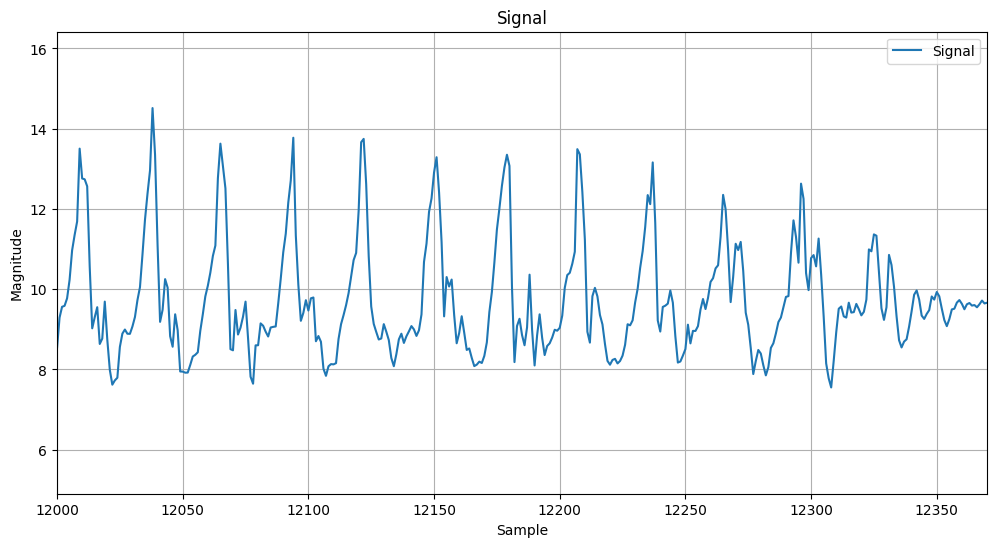

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(data['magnitude'], label='Signal')
plt.xlabel('Sample')
plt.ylabel('Magnitude')
plt.title('Signal')
plt.legend()
plt.xlim(12000,12370)
plt.grid(True)
plt.show()

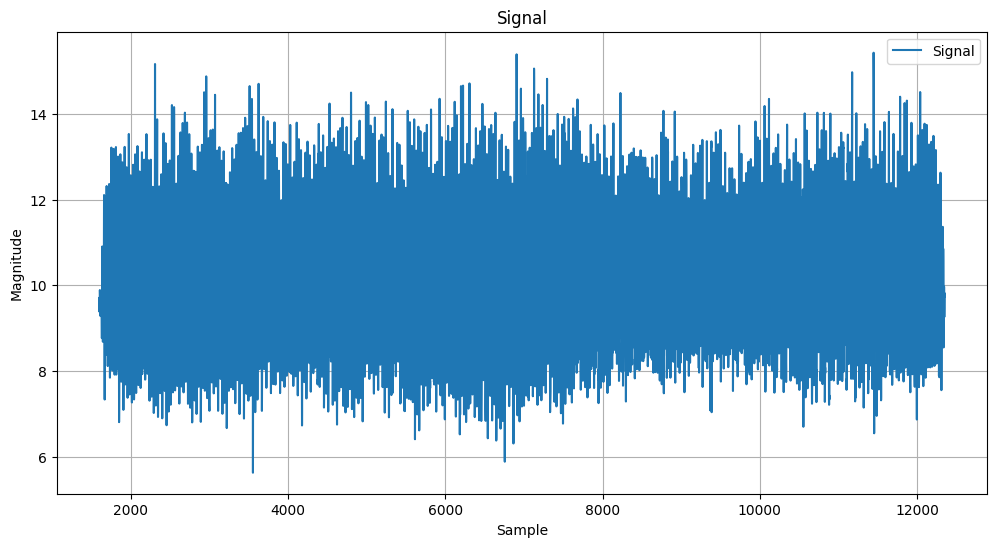

In [ ]:
new_data = data[1600:12350]
plt.figure(figsize=(12, 6))
plt.plot(new_data['magnitude'], label='Signal')
plt.xlabel('Sample')
plt.ylabel('Magnitude')
plt.title('Signal')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# ['climbing_stairs.csv','descending_stairs.csv','running.csv','sitting_standing_transition.csv','walking.csv','nothing1.csv','nothing2.csv']

In [ ]:
new_data.to_csv('walking.csv', index=False)

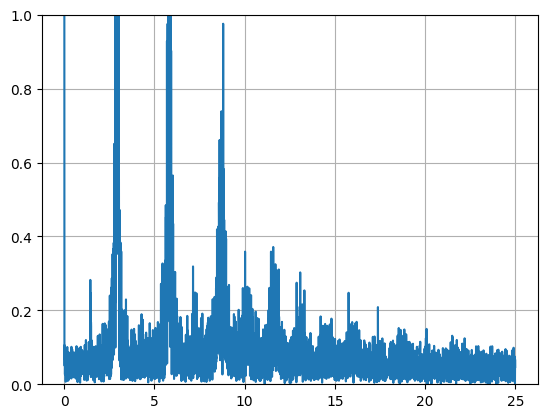

In [ ]:
import numpy as np
from scipy.fft import fft, fftfreq
# Number of sample points
N = len(magnitude)
# sample spacing
T = 1.0 / 50
yf = fft(magnitude)
xf = fftfreq(N, T)[:N//2]
plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]))
plt.ylim(0,1)
plt.grid()
plt.show()


# Step 3  Clean Noise and remove gravity

In [ ]:
from scipy.signal import butter, lfilter

In [ ]:
def bandpass_filter(data, lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    y = lfilter(b, a, data)
    return y

fs = 50  # Sampling frequency
lowcut = 0.4  # Lower cutoff frequency (Hz)
highcut = 15  # Upper cutoff frequency (Hz)
signal = np.array(data['magnitude'])

filtered_data = bandpass_filter(signal, lowcut, highcut, fs)

In [ ]:
data['filtered_magnitude'] = filtered_data

In [ ]:
data.to_csv('sitting_standing_transition.csv', index=False)

In [ ]:
filtered_data

array([ 0.96457617,  4.72076135,  8.96469953, ..., -3.99073766,
       -3.47683878, -3.18959577])

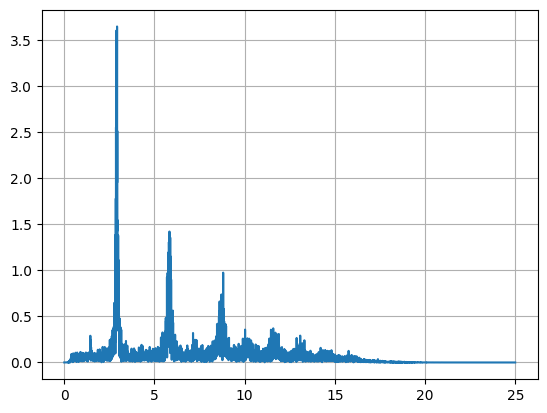

In [ ]:
# Number of sample points
N = len(filtered_data)
# sample spacing
T = 1.0 / 50
yf = fft(filtered_data)
xf = fftfreq(N, T)[:N//2]
import matplotlib.pyplot as plt
plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]))
plt.grid()
plt.show()

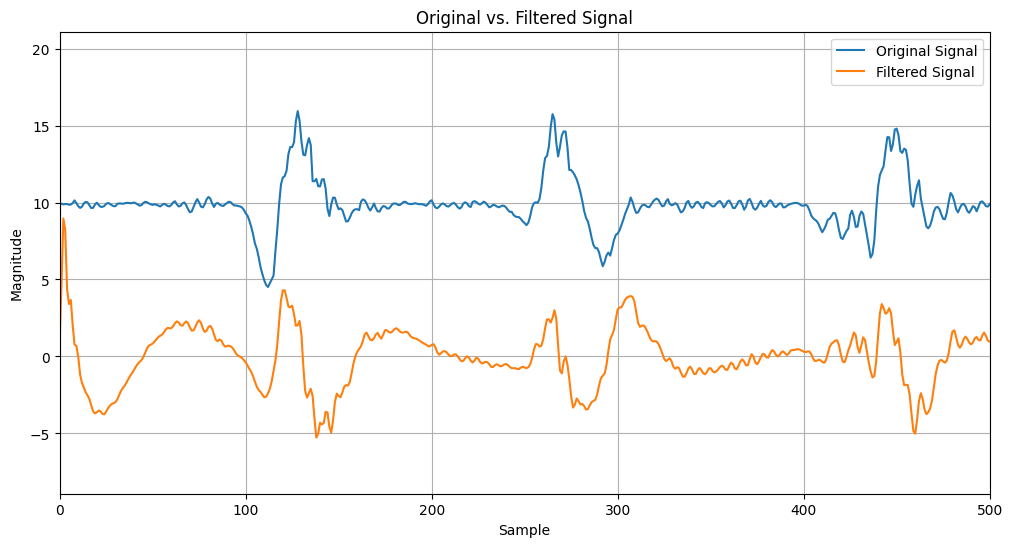

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(signal, label='Original Signal')
plt.plot(filtered_data, label='Filtered Signal')
plt.xlabel('Sample')
plt.ylabel('Magnitude')
plt.title('Original vs. Filtered Signal')
plt.legend()
plt.xlim(0,500)
plt.grid(True)
plt.show()


# Auto

In [ ]:
def calculate_magnitude(x, y, z):
    return np.sqrt(x**2 + y**2 + z**2)

def bandpass_filter(data, lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    y = lfilter(b, a, data)
    return y

def cleaning101(data,filename):
    df = data.copy()
    x = np.array(df['x'].values)
    y = np.array(df['y'].values)
    z = np.array(df['z'].values)
    magnitude = calculate_magnitude(x, y, z)
    df['magnitude'] = magnitude

    fs = 50  # Sampling frequency
    lowcut = 0.4  # Lower cutoff frequency (Hz)
    highcut = 15  # Upper cutoff frequency (Hz)
    signal = np.array(df['magnitude'])

    filtered_data = bandpass_filter(signal, lowcut, highcut, fs)
    df['filtered_magnitude'] = filtered_data
    df.to_csv(filename, index=False)
    return df

In [ ]:
data = [climbing,descending,nothing1,nothing2,running,sitting,walking]
filename = ['climbing_stairs.csv','descending_stairs.csv','nothing1.csv','nothing2.csv','running.csv','sitting_standing_transition.csv','walking.csv']
for i in range(len(data)):
  df = cleaning101(data[i],filename[i])

# Step 4 windowing + stft

In [ ]:
def segment_and_flatten_magnitude(df, label=None, magnitude_column_name='filtered_magnitude', window_size_sec=5, overlap=0.5):
        """
        1) Combine x, y, z signals into a single magnitude signal.
        2) Segment the magnitude signal into windows of window_size_sec seconds
        with the specified overlap.
        3) Flatten each window into columns: start_time, x1, x2, ..., xN
        (where N = window_size_sec * sampling_rate).

        Parameters:
            df (pd.DataFrame): DataFrame containing columns 'time', 'x', 'y', 'z'.
                            'time' is in milliseconds.
            magnitude_column_name (string): Target column name that already calculate magnitude.
            window_size_sec (float): Length of each window in seconds (default 5).
            overlap (float): Fraction of window overlap (default 0.5 = 50%).
            sampling_rate (int): Sampling rate in Hz (default 50).

        Returns:
            pd.DataFrame: Each row corresponds to a flattened window.
                        Columns:
                        - 'start_time': millisecond timestamp of the window start
                        - 'x1', 'x2', ..., 'xN': magnitude values for each sample
        """
        # Sort by time to ensure chronological order
        df = df.sort_values(by='time').reset_index(drop=True)

        # 1) Compute magnitude for each row
        if not magnitude_column_name:
            df['magnitude'] = calculate_magnitude(df['x'], df['y'], df['z'])
        sampling_rate = 50
        # 2) Calculate number of samples per window and step size
        window_samples = int(window_size_sec * sampling_rate)  # e.g., 5s * 50Hz = 250
        step_size = int(window_samples * (1 - overlap))        # e.g., 250 * 0.5 = 125

        flattened_rows = []

        # 3) Loop through data with the given step size
        for start_idx in range(0, len(df) - window_samples + 1, step_size):
            # Extract this window of magnitude values
            window = df.iloc[start_idx : start_idx + window_samples].reset_index(drop=True)

            # Prepare a dict for one flattened row
            row_dict = {}
            row_dict['start_time'] = window.loc[0, 'time']
            row_dict['label'] = label

            # Flatten magnitude into x1, x2, x3, ..., xN
            for i in range(window_samples):
                if magnitude_column_name:
                    row_dict[f'x{i+1}'] = window.loc[i, magnitude_column_name]
                else:
                    row_dict[f'x{i+1}'] = window.loc[i, 'magnitude']

            flattened_rows.append(row_dict)

        # Convert list of dicts into a DataFrame
        return pd.DataFrame(flattened_rows)

In [ ]:
# prompt: create stft for each row and save output
import os
import librosa
import numpy as np

def calculate_stft_and_save(df, filename, output_folder, nfft=250):
    # Assuming df has columns like 'x1', 'x2', ..., 'xN' representing the magnitude
    magnitude_data = df.filter(regex='^x').values

    # Calculate STFT for each row
    stft_results = []
    for row in magnitude_data:
        # Convert to float32 as librosa requires it
        row = row.astype(np.float32)
        stft = librosa.stft(row,n_fft=nfft)
        stft_results.append(stft)

    # Now save the stft_results (replace with your preferred saving method)
    full_filename = os.path.join(output_folder, filename)
    np.save(full_filename, np.array(stft_results))

    print(f"STFT results for {full_filename} saved successfully.")
    return np.array(stft_results)

In [ ]:
data = [climbing_backpack,descending_backback,nothing1_backback,nothing2_backback,running_backback,sitting_backback,walking_backback,
        climbing_hand,descending_hand,nothing1_hand,nothing2_hand,running_hand,sitting_hand,walking_hand,
        climbing_leg,descending_leg,nothing1_leg,nothing2_leg,running_leg,sitting_leg,walking_leg,
        climbing_shirtdown,descending_shirtdown,nothing1_shirtdown,nothing2_shirtdown,running_shirtdown,sitting_shirtdown,walking_shirtdown,
        climbing_shirtup,descending_shirtup,nothing1_shirtup,nothing2_shirtup,running_shirtup,sitting_shirtup,walking_shirtup]
class_names = ['class1_climbing','class2_descending','class3_nothing1','class3_nothing2','class4_running','class5_sitting','class6_walking']
position = ['backpack','hand','leg','shirtdown','shirtup']
filenames = []

for i in range(len(data)):
  filenames.append(f"{class_names[i%7]}_{position[i//7]}")

In [ ]:
filenames

['class1_climbing_backpack',
 'class2_descending_backpack',
 'class3_nothing1_backpack',
 'class3_nothing2_backpack',
 'class4_running_backpack',
 'class5_sitting_backpack',
 'class6_walking_backpack',
 'class1_climbing_hand',
 'class2_descending_hand',
 'class3_nothing1_hand',
 'class3_nothing2_hand',
 'class4_running_hand',
 'class5_sitting_hand',
 'class6_walking_hand',
 'class1_climbing_leg',
 'class2_descending_leg',
 'class3_nothing1_leg',
 'class3_nothing2_leg',
 'class4_running_leg',
 'class5_sitting_leg',
 'class6_walking_leg',
 'class1_climbing_shirtdown',
 'class2_descending_shirtdown',
 'class3_nothing1_shirtdown',
 'class3_nothing2_shirtdown',
 'class4_running_shirtdown',
 'class5_sitting_shirtdown',
 'class6_walking_shirtdown',
 'class1_climbing_shirtup',
 'class2_descending_shirtup',
 'class3_nothing1_shirtup',
 'class3_nothing2_shirtup',
 'class4_running_shirtup',
 'class5_sitting_shirtup',
 'class6_walking_shirtup']

In [ ]:
# [climbing,descending,nothing1,nothing2,running,sitting,walking]
# [backpack,hand,leg,shirtdown,shirtup]
fs = 50
window = 2
nfft_num = fs*window
for i in range(len(data)):
  temp = data[i].copy()
  win_temp = segment_and_flatten_magnitude(temp,window_size_sec=window)
  win_temp.drop('label',axis=1,inplace=True)
  win_temp.drop('start_time',axis=1,inplace=True)
  stft_data = calculate_stft_and_save(win_temp, filenames[i], 'save_folder',nfft=nfft_num)


STFT results for save_folder/class1_climbing_backpack saved successfully.
STFT results for save_folder/class2_descending_backpack saved successfully.
STFT results for save_folder/class3_nothing1_backpack saved successfully.
STFT results for save_folder/class3_nothing2_backpack saved successfully.
STFT results for save_folder/class4_running_backpack saved successfully.
STFT results for save_folder/class5_sitting_backpack saved successfully.
STFT results for save_folder/class6_walking_backpack saved successfully.
STFT results for save_folder/class1_climbing_hand saved successfully.
STFT results for save_folder/class2_descending_hand saved successfully.
STFT results for save_folder/class3_nothing1_hand saved successfully.
STFT results for save_folder/class3_nothing2_hand saved successfully.
STFT results for save_folder/class4_running_hand saved successfully.
STFT results for save_folder/class5_sitting_hand saved successfully.
STFT results for save_folder/class6_walking_hand saved successf

In [ ]:
!zip -r spectrum_win2.zip save_folder

  adding: save_folder/ (stored 0%)
  adding: save_folder/class1_climbing_shirtdown.npy (deflated 6%)
  adding: save_folder/class3_nothing2_shirtdown.npy (deflated 6%)
  adding: save_folder/class5_sitting_leg.npy (deflated 5%)
  adding: save_folder/class1_climbing_shirtup.npy (deflated 6%)
  adding: save_folder/class3_nothing2_leg.npy (deflated 6%)
  adding: save_folder/class3_nothing1_backpack.npy (deflated 6%)
  adding: save_folder/class6_walking_backpack.npy (deflated 6%)
  adding: save_folder/class3_nothing2_shirtup.npy (deflated 6%)
  adding: save_folder/class4_running_shirtdown.npy (deflated 6%)
  adding: save_folder/class3_nothing1_leg.npy (deflated 6%)
  adding: save_folder/class6_walking_leg.npy (deflated 6%)
  adding: save_folder/class4_running_shirtup.npy (deflated 6%)
  adding: save_folder/class6_walking_hand.npy (deflated 6%)
  adding: save_folder/class3_nothing2_backpack.npy (deflated 6%)
  adding: save_folder/class3_nothing1_hand.npy (deflated 6%)
  adding: save_folder/cl

In [ ]:
from google.colab import files
files.download("spectrum_win2.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

----------------------------------------------------------------------------------------------------------------------------

In [ ]:
loaded_stft = np.load("/content/train/spectro_patronum/class1_climbing_hand.npy")

In [ ]:
loaded_stft.shape

(69, 126, 5)

In [ ]:
loaded_stft[0].shape

(126, 5)

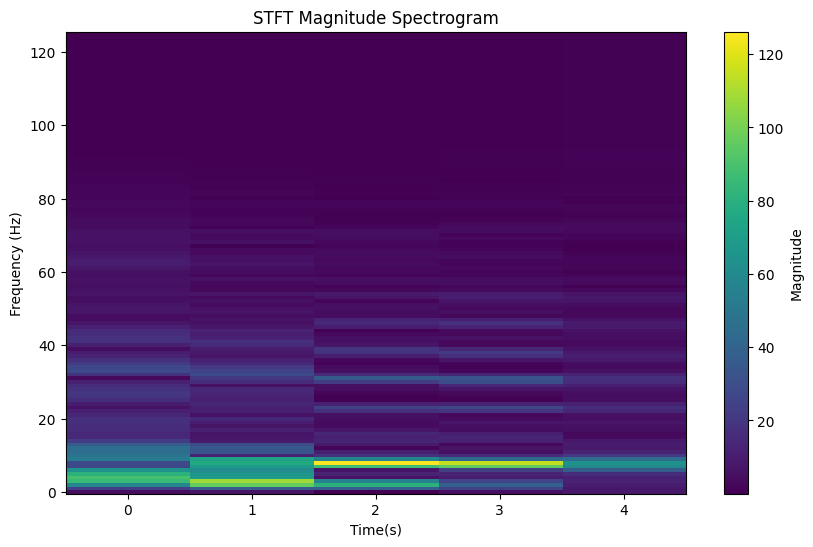

In [ ]:
# prompt: plot loaded_stft

import numpy as np
import matplotlib.pyplot as plt

# Assuming loaded_stft is already loaded as in the provided code

# Plot the magnitude spectrogram of the first STFT result
plt.figure(figsize=(10, 6))
plt.imshow(np.abs(loaded_stft[0]), aspect='auto', cmap='viridis', origin='lower')
plt.colorbar(label='Magnitude')
plt.title('STFT Magnitude Spectrogram')
plt.xlabel('Time(s)')
plt.ylabel('Frequency (Hz)')
plt.show()


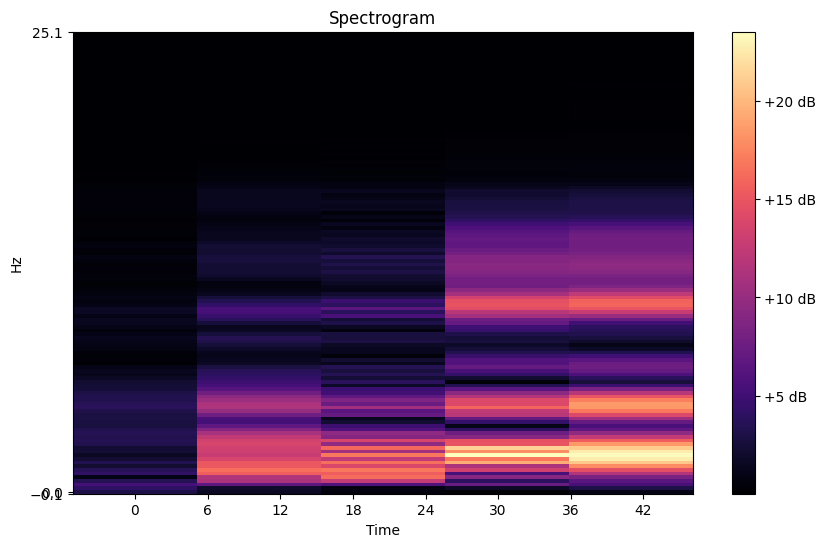

In [ ]:
# prompt: use librosa.display.specshow() to plot spectrogram x is time yis frequency

import matplotlib.pyplot as plt
import numpy as np
import librosa.display
# Assuming loaded_stft is already loaded as in the provided code

# Plot the magnitude spectrogram of the first STFT result using librosa.display.specshow
D = np.abs(loaded_stft[4])
plt.figure(figsize=(10, 6))
librosa.display.specshow(D, sr=50, x_axis='time', y_axis='log') # Assuming a sampling rate of 50 Hz
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram')
plt.show()


# Step 5 Modeling

In [ ]:
import torch
import numpy as np
from torch.utils.data import Dataset, DataLoader
import os

class STFTDataset(Dataset):
    def __init__(self, data_dir, label_map, transform=None):
        self.data_dir = data_dir
        self.file_names = sorted(os.listdir(data_dir)) #sort the file names to keep them in order.
        self.label_map = label_map
        self.transform = transform
        self.data = []
        self.create_data()

    def __len__(self):
        return len(self.data)

    def create_data(self):
        for file_name in self.file_names:
            file_path = os.path.join(self.data_dir, file_name)
            spectrogram = np.load(file_path)
            label = self.label_map[file_name]
            for i in range(spectrogram.shape[0]):
                self.data.append((torch.tensor(np.abs(spectrogram[i])),torch.tensor(label)))

    def __getitem__(self, idx):
        img, label = self.data[idx]
        return img, label

In [ ]:
spectrogram = np.load('/content/train/spectro_patronum/class1_climbing_backpack.npy')

# spectrogram = np.expand_dims(spectrogram, axis=0)
# spectrogram = torch.from_numpy(spectrogram).float()
# spectrogram.shape


59

In [ ]:
spectrogram[0].shape

(126, 5)

In [ ]:
a = np.abs(spectrogram[0])

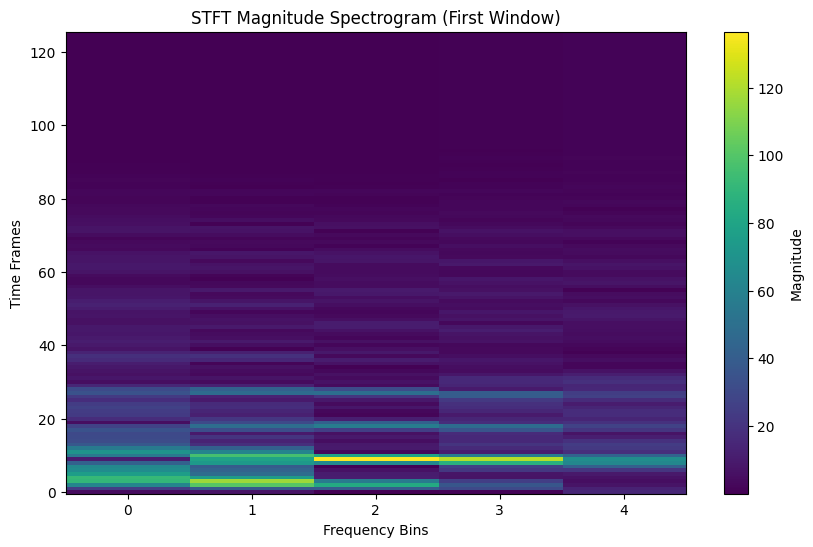

In [ ]:
# prompt: plot spectrogram[0]

import matplotlib.pyplot as plt
import numpy as np

# Assuming loaded_stft is already loaded as in the provided code
# and contains the spectrogram data

# Plot the magnitude spectrogram of the first STFT result
plt.figure(figsize=(10, 6))
plt.imshow(np.abs(spectrogram[0]), aspect='auto', cmap='viridis', origin='lower')
plt.colorbar(label='Magnitude')
plt.title('STFT Magnitude Spectrogram (First Window)')
plt.xlabel('Frequency Bins')
plt.ylabel('Time Frames')
plt.show()


In [ ]:
def create_label_map(data_dir):
    """Creates a dictionary mapping filenames to labels."""
    label_map = {}
    for file_name in os.listdir(data_dir):
        # Example: Extract label from filename (adjust as needed)
        if file_name.startswith("class1"):
            label_map[file_name] = 0
        elif file_name.startswith("class2"):
            label_map[file_name] = 1
        elif file_name.startswith("class3"):
            label_map[file_name] = 2
        elif file_name.startswith("class4"):
            label_map[file_name] = 3
        elif file_name.startswith("class5"):
            label_map[file_name] = 4
        elif file_name.startswith("class6"):
            label_map[file_name] = 5
        # Add more label mappings as needed.
    return label_map

In [ ]:
seed = 42
torch.manual_seed(seed)
np.random.seed(seed)
random.seed(seed)

In [ ]:
# Example Usage
# train_data_dir = "/content/save_folder"  # Replace with your data directory
train_data_dir = "/content/spectro_patronum"
train_label_map = create_label_map(train_data_dir)
traindataset = STFTDataset(train_data_dir, train_label_map)
trainloader = DataLoader(traindataset, batch_size=16, shuffle=True)

# test_data_dir = "/content/test/spectro_test"  # Replace with your data directory
# test_label_map = create_label_map(test_data_dir)
# testdataset = STFTDataset(test_data_dir, test_label_map)
# testloader = DataLoader(testdataset, batch_size=16, shuffle=True)

In [ ]:
# prompt: split train test from traindataset

from sklearn.model_selection import train_test_split

# Assuming 'traindataset' is your STFTDataset object
train_indices, test_indices = train_test_split(
    list(range(len(traindataset))), test_size=0.2, random_state=42  # Adjust test_size as needed
)

train_subset = torch.utils.data.Subset(traindataset, train_indices)
test_subset = torch.utils.data.Subset(traindataset, test_indices)

trainloader = DataLoader(train_subset, batch_size=16, shuffle=True)
testloader = DataLoader(test_subset, batch_size=16, shuffle=False) #No need to shuffle test data


In [ ]:
for spectrograms, labels in trainloader:
    print("Spectrograms shape:", spectrograms.shape)
    print("Labels shape:", labels.shape)
    print("Labels:", labels)
    break  # Just print the first batch for demonstration

for spectrograms, labels in testloader:
    print("Spectrograms shape:", spectrograms.shape)
    print("Labels shape:", labels.shape)
    print("Labels:", labels)
    break  # Just print the first batch for demonstration

Spectrograms shape: torch.Size([16, 51, 5])
Labels shape: torch.Size([16])
Labels: tensor([5, 5, 2, 4, 1, 2, 5, 4, 4, 3, 4, 2, 0, 0, 3, 5])
Spectrograms shape: torch.Size([16, 51, 5])
Labels shape: torch.Size([16])
Labels: tensor([5, 0, 2, 3, 4, 2, 1, 4, 0, 5, 3, 0, 4, 1, 0, 5])


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class SpectrogramCNN(nn.Module):
    def __init__(self, num_classes):
        super(SpectrogramCNN, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=5, out_channels=16, kernel_size=(3, 1), padding=(1, 0)) # kernel_size and padding adjusted.
        self.conv2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=(3, 1), padding=(1, 0)) # kernel_size and padding adjusted.
        self.pool = nn.MaxPool2d(kernel_size=(2, 1), stride=(2, 1)) # pool only the height dimension.
        self.fc1 = nn.Linear(32 * 31 * 1, 128) # adjusted based on calculated feature map size.
        self.fc2 = nn.Linear(128, num_classes)

    def forward(self, x):
        x = x.permute(0, 2, 1).unsqueeze(-1) # permute and add width dimension.
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.reshape(-1, 32 * 31 * 1)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        x = F.softmax(x, dim=1)
        return x

# Example usage:
num_classes = 6 # Replace with your number of classes
model = SpectrogramCNN(num_classes)
input_tensor = torch.randn(16, 126, 5) #creating dummy data, to test the model.
output = model(input_tensor)
print(output.shape)

torch.Size([16, 6])


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
# for win5
class DeeperSpectrogramCNN(nn.Module):
    def __init__(self, num_classes):
        super(DeeperSpectrogramCNN, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=5, out_channels=32, kernel_size=(3, 1), padding=(1, 0))
        self.bn1 = nn.BatchNorm2d(32) # Batch Normalization
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=(3, 1), padding=(1, 0))
        self.bn2 = nn.BatchNorm2d(64)
        self.conv3 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=(3, 1), padding=(1, 0))
        self.bn3 = nn.BatchNorm2d(128)
        self.pool = nn.MaxPool2d(kernel_size=(2, 1), stride=(2, 1))

        self.fc1 = nn.Linear(128 * 15 * 1, 512) # Adjusted input size, double-check the calculation!
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, num_classes)

    def forward(self, x):
        x = x.permute(0, 2, 1).unsqueeze(-1)  # permute and add width dimension for Conv2d
        x = self.pool(F.relu(self.bn1(self.conv1(x))))
        x = self.pool(F.relu(self.bn2(self.conv2(x))))
        x = self.pool(F.relu(self.bn3(self.conv3(x))))
        # Reshape to flatten the tensor before feeding it to the fully connected layers
        # The size should match the output of the convolutional layers
        x = x.view(x.size(0), -1)  # Using view() for dynamic reshaping
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        x = F.softmax(x, dim=1)
        return x

In [ ]:
# for win2
import torch
import torch.nn as nn
import torch.nn.functional as F

class DeeperSpectrogramCNN(nn.Module):
    def __init__(self, num_classes):
        super(DeeperSpectrogramCNN, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=5, out_channels=32, kernel_size=(3, 1), padding=(1, 0))
        self.bn1 = nn.BatchNorm2d(32)
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=(3, 1), padding=(1, 0))
        self.bn2 = nn.BatchNorm2d(64)
        self.conv3 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=(3, 1), padding=(1, 0))
        self.bn3 = nn.BatchNorm2d(128)
        self.pool = nn.MaxPool2d(kernel_size=(2, 1), stride=(2, 1))

        self.fc1 = nn.Linear(128 * 6 * 1, 512)  # Corrected input size
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, num_classes)

    def forward(self, x):
        x = x.permute(0, 2, 1).unsqueeze(-1)
        x = self.pool(F.relu(self.bn1(self.conv1(x))))
        x = self.pool(F.relu(self.bn2(self.conv2(x))))
        x = self.pool(F.relu(self.bn3(self.conv3(x))))
        x = x.view(x.size(0), -1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        x = F.softmax(x, dim=1)
        return x

In [ ]:
num_classes=6
model = DeeperSpectrogramCNN(num_classes)

total_params = sum(p.numel() for p in model.parameters())
print(f"Total parameters: {total_params}")

#If you wish to only count trainable parameters:
total_trainable_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
print(f"Total trainable parameters: {total_trainable_params}")

#Another way using torch.nn.utils.parameters_to_vector
import torch.nn.utils as utils
total_params_vector = utils.parameters_to_vector(model.parameters()).numel()
print(f"Total parameters from vector: {total_params_vector}")

Total parameters: 558470
Total trainable parameters: 558470
Total parameters from vector: 558470


In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

def train(model, dataloader, criterion, optimizer, device, epochs):
    """
    Trains a CNN model.

    Args:
        model (nn.Module): The CNN model to train.
        dataloader (DataLoader): The DataLoader for the training data.
        criterion (nn.Module): The loss function.
        optimizer (optim.Optimizer): The optimizer.
        device (str): 'cuda' or 'cpu'.
        epochs (int): The number of training epochs.
    """

    model.train()  # Set the model to training mode

    for epoch in range(epochs):
        running_loss = 0.0
        for inputs, labels in dataloader:
            inputs = inputs.to(device)
            labels = labels.to(device)

            optimizer.zero_grad()  # Zero the parameter gradients

            outputs = model(inputs)  # Forward pass
            loss = criterion(outputs, labels)  # Calculate the loss
            loss.backward()  # Backward pass
            optimizer.step()  # Optimize

            running_loss += loss.item()

        epoch_loss = running_loss / len(dataloader)
        print(f"Epoch {epoch+1}/{epochs}, Loss: {epoch_loss:.4f}")

    print("Finished Training")

# Example usage (assuming you have a model, dataloader, criterion, optimizer, and device):

model = DeeperSpectrogramCNN(num_classes).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0005)
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
epochs = 100

train(model, trainloader, criterion, optimizer, device, epochs)

Epoch 1/100, Loss: 1.3262
Epoch 2/100, Loss: 1.1413
Epoch 3/100, Loss: 1.1162
Epoch 4/100, Loss: 1.0999
Epoch 5/100, Loss: 1.1039
Epoch 6/100, Loss: 1.0885
Epoch 7/100, Loss: 1.0800
Epoch 8/100, Loss: 1.0993
Epoch 9/100, Loss: 1.0767
Epoch 10/100, Loss: 1.0735
Epoch 11/100, Loss: 1.0684
Epoch 12/100, Loss: 1.0670
Epoch 13/100, Loss: 1.0859
Epoch 14/100, Loss: 1.0762
Epoch 15/100, Loss: 1.0708
Epoch 16/100, Loss: 1.0754
Epoch 17/100, Loss: 1.0582
Epoch 18/100, Loss: 1.0585
Epoch 19/100, Loss: 1.0654
Epoch 20/100, Loss: 1.0544
Epoch 21/100, Loss: 1.0571
Epoch 22/100, Loss: 1.0584
Epoch 23/100, Loss: 1.0720
Epoch 24/100, Loss: 1.0684
Epoch 25/100, Loss: 1.0616
Epoch 26/100, Loss: 1.0586
Epoch 27/100, Loss: 1.0578
Epoch 28/100, Loss: 1.0555
Epoch 29/100, Loss: 1.0551
Epoch 30/100, Loss: 1.0500
Epoch 31/100, Loss: 1.0643
Epoch 32/100, Loss: 1.0769
Epoch 33/100, Loss: 1.0613
Epoch 34/100, Loss: 1.0596
Epoch 35/100, Loss: 1.0559
Epoch 36/100, Loss: 1.0567
Epoch 37/100, Loss: 1.0623
Epoch 38/1

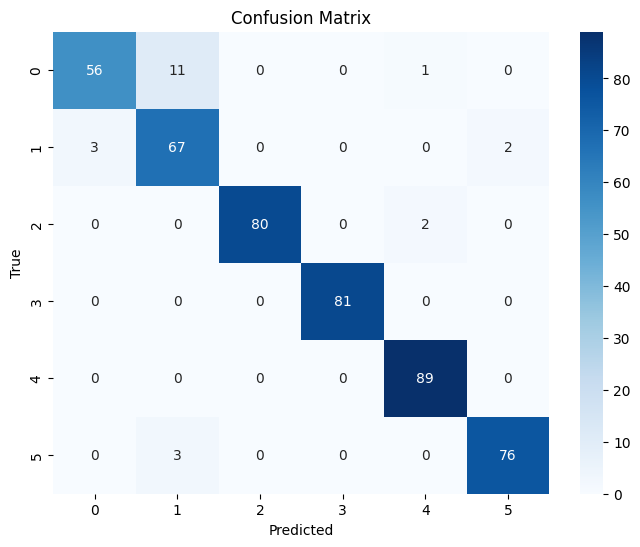

              precision    recall  f1-score   support

           0       0.95      0.82      0.88        68
           1       0.83      0.93      0.88        72
           2       1.00      0.98      0.99        82
           3       1.00      1.00      1.00        81
           4       0.97      1.00      0.98        89
           5       0.97      0.96      0.97        79

    accuracy                           0.95       471
   macro avg       0.95      0.95      0.95       471
weighted avg       0.96      0.95      0.95       471



In [ ]:
# prompt: create test function and show confusion metric and classification report

from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

def test_model(model, dataloader, device):
    """
    Tests a trained CNN model and prints the confusion matrix and classification report.

    Args:
        model (nn.Module): The trained CNN model.
        dataloader (DataLoader): The DataLoader for the test data.
        device (str): 'cuda' or 'cpu'.
    """
    model.eval()  # Set the model to evaluation mode

    y_true = []
    y_pred = []

    with torch.no_grad():  # Disable gradient calculation during testing
        for inputs, labels in dataloader:
            inputs = inputs.to(device)
            labels = labels.to(device)

            outputs = model(inputs)  # Forward pass
            _, predicted = torch.max(outputs, 1)  # Get predicted class indices

            y_true.extend(labels.cpu().numpy())
            y_pred.extend(predicted.cpu().numpy())

    # Compute and print the confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.title("Confusion Matrix")
    plt.show()

    # Compute and print the classification report
    print(classification_report(y_true, y_pred))


# Example usage:
# Assuming you have a trained model, testloader, and device
test_model(model, testloader, device)
